In [1]:
from SpinHamiltonian import ZeemanSpinHamiltonian, HyperfineSpinHamiltonian, ElectronicSpinHamiltonian

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['lines.linewidth'] = 2

* plot_magnetic_field_spin_projections() - spins.py
* plotter_resonance() - spin1-spin1.py
* BvsF_plotter() - spin1-spin1.py

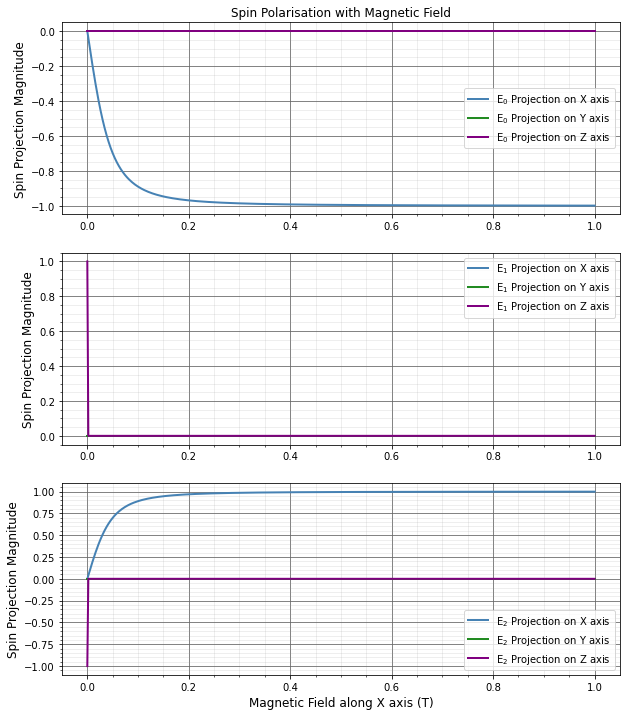

In [19]:
ham = ZeemanSpinHamiltonian()
def plot_magnetic_field_spin_projections():

    B = np.linspace(0,1,500)
    sham = np.vectorize(ham.spin_projection, otypes=[np.ndarray])
    spins = np.array(sham(B, theta=0, z=0)) 			# contains all 9 spin components for all magnetic fields
    spins = np.array(spins.tolist())

    fig = plt.figure(figsize=(10,12))
    ax = plt.subplot(311)  
    ax.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax.set_title("Spin Polarisation with Magnetic Field")
    ax.plot(B,spins[:,0],color='steelblue', label="E$_{0}$ Projection on X axis") 
    ax.plot(B,spins[:,1],color='forestgreen',label="E$_{0}$ Projection on Y axis") 
    ax.plot(B,spins[:,2],color='purple',label="E$_{0}$ Projection on Z axis") 
    ax.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    ax1 = plt.subplot(312)
    ax1.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax1.plot(B,spins[:,3],color='steelblue', label="E$_{1}$ Projection on X axis") 
    ax1.plot(B,spins[:,4],color='forestgreen',label="E$_{1}$ Projection on Y axis") 
    ax1.plot(B,spins[:,5],color='purple',label="E$_{1}$ Projection on Z axis")
    ax1.legend() 
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    ax2 = plt.subplot(313)
    ax2.set_xlabel("Magnetic Field along X axis (T)",fontsize=12)
    ax2.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax2.plot(B,spins[:,6],color='steelblue', label="E$_{2}$ Projection on X axis") 
    ax2.plot(B,spins[:,7],color='forestgreen',label="E$_{2}$ Projection on Y axis") 
    ax2.plot(B,spins[:,8],color='purple',label="E$_{2}$ Projection on Z axis") 
    ax2.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.savefig('figs/zeeman_spin_polarisation.png', bbox_inches="tight")
    plt.show()

if __name__=="__main__":
    plot_magnetic_field_spin_projections()

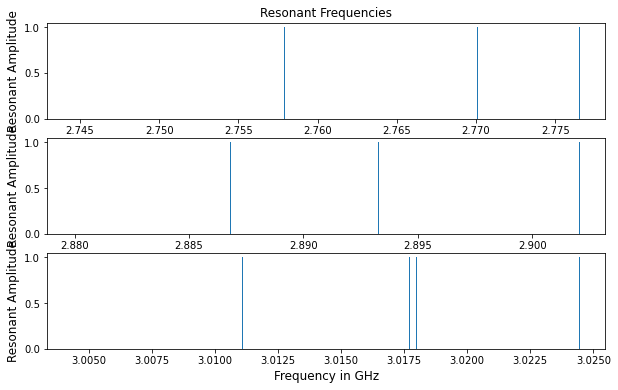

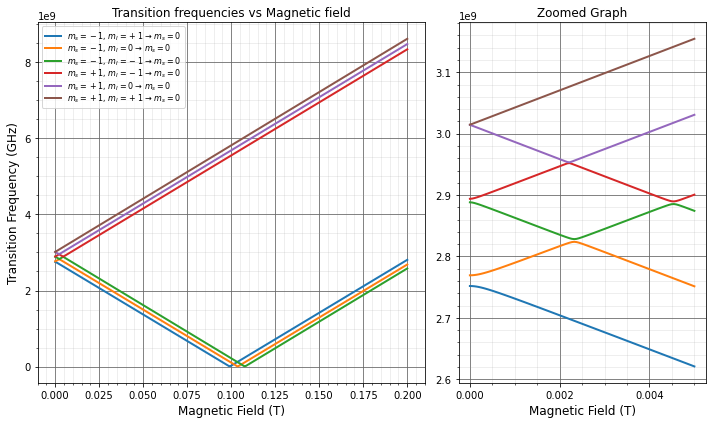

In [3]:
ham = HyperfineSpinHamiltonian()

# Plotting Hyperfine Resonant frequencies
def plotter_resonance(): 
    # generating all possible frequencies
    reso = np.full((18),1)
    freq = []
    egsts = ham.eigenvalues(1.199e-4)
    for i in range (3):
        for j in range (3,9):
            freq.append(egsts[j]-egsts[i])
    freq = np.sort(freq)*0.000000001

    # plot first 6 frequencies
    fig = plt.figure()
    ax1 = fig.add_subplot(311)
    ax1.set_ylabel('Resonant Amplitude',fontsize=12)
    ax1.set_title("Resonant Frequencies")
    ax1.bar(freq[0:6],reso[0:6],width=0.00003,bottom=None)

    # plot next 6 frequencies
    ax2 = fig.add_subplot(312)
    ax2.set_ylabel('Resonant Amplitude',fontsize=12)
    ax2.bar(freq[6:12],reso[0:6],width=0.00003,bottom=None)

    # plot next 6 frequencies
    ax3 = fig.add_subplot(313)
    ax3.set_xlabel('Frequency in GHz',fontsize=12)
    ax3.set_ylabel('Resonant Amplitude',fontsize=12)
    ax3.bar(freq[12:18],reso[0:6],width=0.00003,bottom=None)
    plt.show()
    
#Plotting ms=0 to ms=1 transition frequency as a function of magnetic field for hyperfine Hamiltonian
def BvsF_plotter():
    # B covers fields until the point where ms=-1 does not fall below ms=0
    # Bzoom is for the zoomed graph			
    hpham = np.vectorize(ham.transitionFreqs, otypes=[np.ndarray])
    Bz = np.linspace(0,1e-2,100)
    Bzoom = np.linspace(0,5e-3,100)
    freqs = np.array(hpham(Bz))
    freqs = np.array(freqs.tolist())
    freqs_zoom = np.array(hpham(Bzoom))
    freqs_zoom = np.array(freqs_zoom.tolist())

    #Qutip by default arranges eigenvalues in sorted order. This never gives a negative frequency. So the graph has to be extended logically.
    #calculating slope array
    b1 = 1e-2
    f1 = hpham(b1)
    b2 = 0.8e-2
    f2 = hpham(b2)
    m = (f2-f1)/(b2-b1)

    #adding higher magnetic field values
    Bzext = np.linspace(1e-2,0.2,200)
    fext = np.absolute(np.outer(Bzext-b1,m) + f1)

    #appending B and f arrays
    Bz = np.append(Bz,Bzext)
    freqs = np.append(freqs,fext,axis=0)

    fig = plt.figure()
    ax = plt.subplot2grid((5,5),(0,0),rowspan=5,colspan=3)  # for proper sizing and placement of graph
    ax.set_xlabel("Magnetic Field (T)",fontsize=12)
    ax.set_ylabel("Transition Frequency (GHz)", fontsize=12)
    ax.set_title("Transition frequencies vs Magnetic field")
    ax.plot(Bz,freqs[:,0],label="$m_{s}=-1$, $m_{I}=+1$ \u2192 $m_{s}=0$") 
    ax.plot(Bz,freqs[:,1],label="$m_{s}=-1$, $m_{I}=0$ \u2192 $m_{s}=0$") 
    ax.plot(Bz,freqs[:,2],label="$m_{s}=-1$, $m_{I}=-1$ \u2192 $m_{s}=0$") 
    ax.plot(Bz,freqs[:,3],label="$m_{s}=+1$, $m_{I}=-1$ \u2192 $m_{s}=0$") 
    ax.plot(Bz,freqs[:,4],label="$m_{s}=+1$, $m_{I}=0$ \u2192 $m_{s}=0$") 
    ax.plot(Bz,freqs[:,5],label="$m_{s}=+1$, $m_{I}=+1$ \u2192 $m_{s}=0$") 
    ax.legend(loc='upper left',fontsize=8,labelspacing=0)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    axz = plt.subplot2grid((5,5),(0,3),rowspan=5,colspan=2)  # for proper sizing and placement of graph
    axz.set_xlabel("Magnetic Field (T)",fontsize=12)
    axz.set_title("Zoomed Graph")
    axz.plot(Bzoom,freqs_zoom[:,0],label="$m_{s}=-1$, $m_{I}=+1$ \u2192 $m_{s}=0$") 
    axz.plot(Bzoom,freqs_zoom[:,1],label="$m_{s}=-1$, $m_{I}=0$ \u2192 $m_{s}=0$") 
    axz.plot(Bzoom,freqs_zoom[:,2],label="$m_{s}=-1$, $m_{I}=-1$ \u2192 $m_{s}=0$") 
    axz.plot(Bzoom,freqs_zoom[:,3],label="$m_{s}=+1$, $m_{I}=-1$ \u2192 $m_{s}=0$") 
    axz.plot(Bzoom,freqs_zoom[:,4],label="$m_{s}=+1$, $m_{I}=0$ \u2192 $m_{s}=0$") 
    axz.plot(Bzoom,freqs_zoom[:,5],label="$m_{s}=+1$, $m_{I}=+1$ \u2192 $m_{s}=0$")
    axz.locator_params(axis='x', nbins=4)  			# to reduce crowding of ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    plt.tight_layout()
    plt.show()
    
if __name__=="__main__":
    plotter_resonance()
    BvsF_plotter()

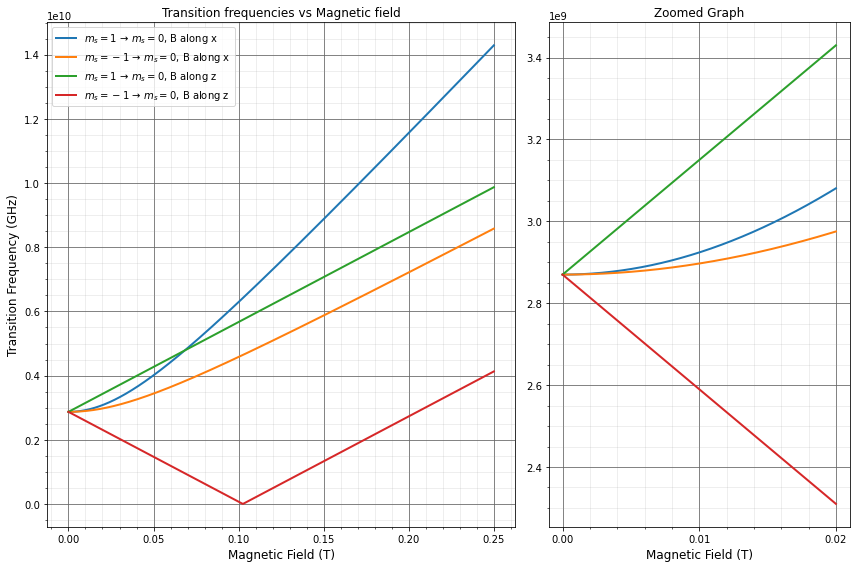

In [10]:
ham = SpinHamiltonian()

#Plotting ms=0 to ms=1 transition frequency as a function of magnetic field for hyperfine Hamiltonian
def BvsF_plotter():
    B = np.linspace(0,0.25,1000)
    Bzoom = np.linspace(0,0.02,500)

    # freqs: perpendicular field frequency array
    # freqsz: parallel field frequency array
    sham = np.vectorize(ham.zeeman_transition_frequencies, otypes=[np.ndarray])
    freqs = np.array(sham(B,0,0))		
    freqs = np.array(freqs.tolist())
    freqsz = np.array(sham(B,0,1))
    freqsz = np.array(freqsz.tolist())

    # freqs_z: zoomed perpendicular field frequency array
    # freqsz_z: zoomed parallel field frequency array
    freqs_z = np.array(sham(Bzoom,0,0))		
    freqs_z = np.array(freqs_z.tolist())
    freqsz_z = np.array(sham(Bzoom,0,1))
    freqsz_z = np.array(freqsz_z.tolist())

    fig = plt.figure(figsize=(12,8))
    ax = plt.subplot2grid((5,5),(0,0),rowspan=5,colspan=3)  # for proper sizing and placement of graph
    ax.set_xlabel("Magnetic Field (T)",fontsize=12)
    ax.set_ylabel("Transition Frequency (GHz)", fontsize=12)
    ax.set_title("Transition frequencies vs Magnetic field")
    ax.plot(B,freqs[:,0],label="$m_{s}=1$ \u2192 $m_{s}=0$, B along x") 
    ax.plot(B,freqs[:,1],label="$m_{s}=-1$ \u2192 $m_{s}=0$, B along x") 
    ax.plot(B,freqsz[:,0],label="$m_{s}=1$ \u2192 $m_{s}=0$, B along z") 
    ax.plot(B,freqsz[:,1],label="$m_{s}=-1$ \u2192 $m_{s}=0$, B along z") 
    ax.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    axz = plt.subplot2grid((5,5),(0,3),rowspan=5,colspan=2)  # for proper sizing and placement of graph
    axz.set_xlabel("Magnetic Field (T)",fontsize=12)
    axz.set_title("Zoomed Graph")
    axz.plot(Bzoom,freqs_z[:,0],label="$m_{s}=1$ \u2192 $m_{s}=0$, B along x") 
    axz.plot(Bzoom,freqs_z[:,1],label="$m_{s}=-1$ \u2192 $m_{s}=0$, B along x") 
    axz.plot(Bzoom,freqsz_z[:,0],label="$m_{s}=1$ \u2192 $m_{s}=0$, B along z") 
    axz.plot(Bzoom,freqsz_z[:,1],label="$m_{s}=-1$ \u2192 $m_{s}=0$, B along z") 
    axz.locator_params(axis='x', nbins=4)  			# to reduce crowding of ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    BvsF_plotter()

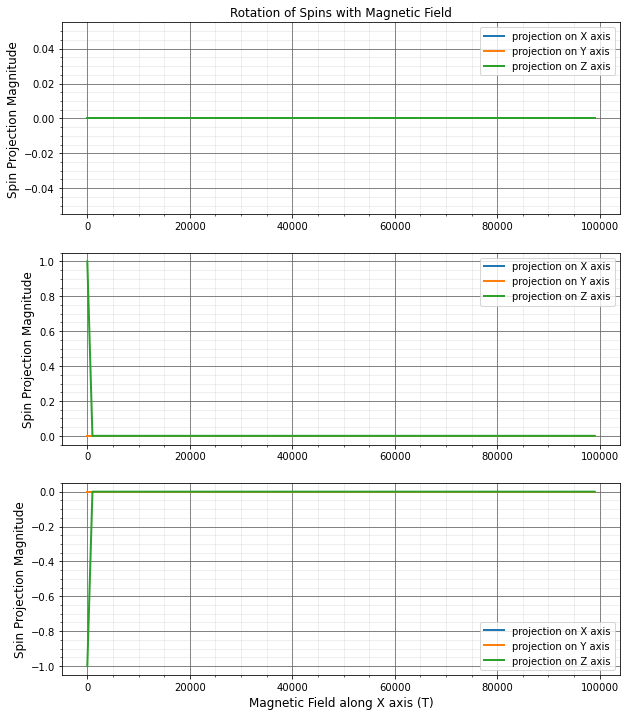

In [11]:
ham = ElectronicSpinHamiltonian()
def plot_electronic_field_spin_projections():

    E = np.arange(0,10,.1)*1e04
    sham = np.vectorize(ham.spin_projection, otypes=[np.ndarray])
    spins = np.array(sham(E, theta=0, z=0)) 			# contains all 9 spin components for all magnetic fields
    spins = np.array(spins.tolist())

    fig = plt.figure(figsize=(10,12))
    ax = plt.subplot(311)  
    ax.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax.set_title("Rotation of Spins with Magnetic Field")
    ax.plot(E,spins[:,0],label="projection on X axis") 
    ax.plot(E,spins[:,1],label="projection on Y axis") 
    ax.plot(E,spins[:,2],label="projection on Z axis") 
    ax.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    ax1 = plt.subplot(312)
    ax1.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax1.plot(E,spins[:,3],label="projection on X axis") 
    ax1.plot(E,spins[:,4],label="projection on Y axis") 
    ax1.plot(E,spins[:,5],label="projection on Z axis")
    ax1.legend() 
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    ax2 = plt.subplot(313)
    ax2.set_xlabel("Magnetic Field along X axis (T)",fontsize=12)
    ax2.set_ylabel("Spin Projection Magnitude", fontsize=12)
    ax2.plot(E,spins[:,6],label="projection on X axis") 
    ax2.plot(E,spins[:,7],label="projection on Y axis") 
    ax2.plot(E,spins[:,8],label="projection on Z axis") 
    ax2.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    plt.show()

if __name__=="__main__":
    plot_electronic_field_spin_projections()

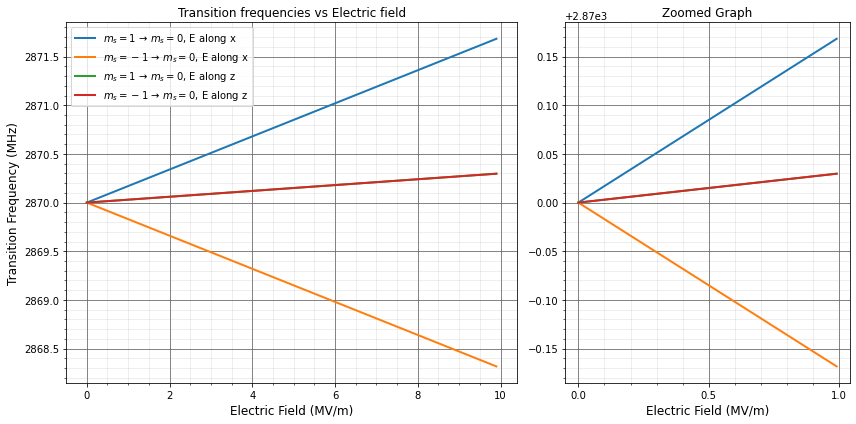

In [8]:
ham = ElectronicSpinHamiltonian()

#Plotting ms=0 to ms=1 transition frequency as a function of magnetic field for hyperfine Hamiltonian
def EvsF_plotter():
    E = np.arange(0,10,.1)*1e06
    Ezoom = np.arange(0,1,.01)*1e06

    # freqs: perpendicular field frequency array
    # freqsz: parallel field frequency array
    sham = np.vectorize(ham.transition_freqs, otypes=[np.ndarray])
    freqs = np.array(sham(E,0,0))
    freqs = np.array(freqs.tolist())
    freqsz = np.array(sham(E,0,1))
    freqsz = np.array(freqsz.tolist())

    # freqs_z: zoomed perpendicular field frequency array
    # freqsz_z: zoomed parallel field frequency array
    freqs_z = np.array(sham(Ezoom,0,0))
    freqs_z = np.array(freqs_z.tolist())
    freqsz_z = np.array(sham(Ezoom,0,1))
    freqsz_z = np.array(freqsz_z.tolist())

    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot2grid((5,5),(0,0),rowspan=5,colspan=3)  # for proper sizing and placement of graph
    ax.set_xlabel("Electric Field (MV/m)",fontsize=12)
    ax.set_ylabel("Transition Frequency (MHz)", fontsize=12)
    ax.set_title("Transition frequencies vs Electric field")
    ax.plot(E*1e-06,freqs[:,0]*1e-06,label="$m_{s}=1$ \u2192 $m_{s}=0$, E along x") 
    ax.plot(E*1e-06,freqs[:,1]*1e-06,label="$m_{s}=-1$ \u2192 $m_{s}=0$, E along x") 
    ax.plot(E*1e-06,freqsz[:,0]*1e-06,label="$m_{s}=1$ \u2192 $m_{s}=0$, E along z") 
    ax.plot(E*1e-06,freqsz[:,1]*1e-06,label="$m_{s}=-1$ \u2192 $m_{s}=0$, E along z") 
    ax.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    axz = plt.subplot2grid((5,5),(0,3),rowspan=5,colspan=2)  # for proper sizing and placement of graph
    axz.set_xlabel("Electric Field (MV/m)",fontsize=12)
    axz.set_title("Zoomed Graph")
    axz.plot(Ezoom*1e-06,freqs_z[:,0]*1e-06,label="$m_{s}=1$ \u2192 $m_{s}=0$, E along x") 
    axz.plot(Ezoom*1e-06,freqs_z[:,1]*1e-06,label="$m_{s}=-1$ \u2192 $m_{s}=0$, E along x") 
    axz.plot(Ezoom*1e-06,freqsz_z[:,0]*1e-06,label="$m_{s}=1$ \u2192 $m_{s}=0$, E along z") 
    axz.plot(Ezoom*1e-06,freqsz_z[:,1]*1e-06,label="$m_{s}=-1$ \u2192 $m_{s}=0$, E along z") 
    axz.locator_params(axis='x', nbins=4)  # to reduce crowding of ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    EvsF_plotter()